In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator, EngFormatter
from matplotlib.ticker import FormatStrFormatter
pd.options.plotting.backend = "plotly"

df = pd.read_csv('avglocs.csv')
df

,Lat,Lon,yerr,xerr,label
0,-10.000000,165.000000,0.00,0.00,Receivers
1,-8.789439,167.420599,0.00,0.00,Receivers
2,-7.578879,169.841198,0.00,0.00,Receivers
3,-6.368318,172.261796,0.00,0.00,Receivers
4,-5.157757,174.682395,0.00,0.00,Receivers
5,-3.947196,177.102994,0.00,0.00,Receivers
6,-2.736636,179.523593,0.00,0.00,Receivers
7,-1.526075,181.944191,0.00,0.00,Receivers
8,-0.315514,184.364790,0.00,0.00,Receivers
9,0.895047,186.785389,0.00,0.00,Receivers


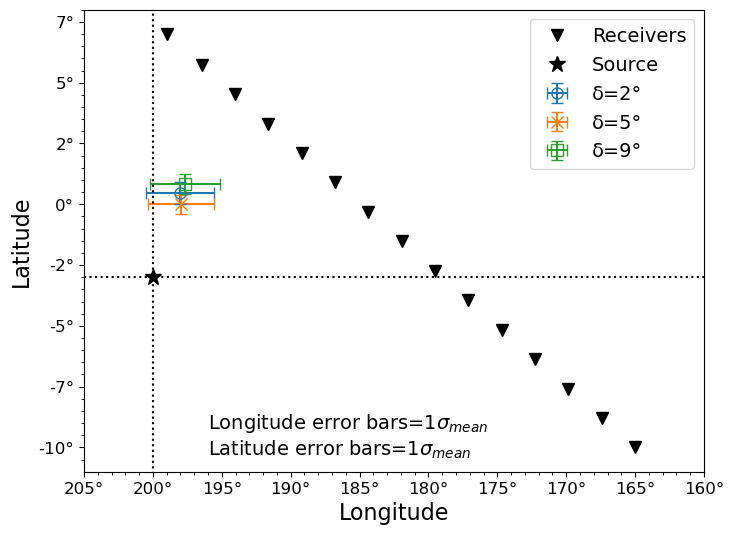

In [93]:
df2=df
groups = df2.groupby('label')
plt.rcdefaults()
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
markers = {'Receivers':'v', 'Source':'*', '2':'o', '5':'x', '9':'s'}
for name, group in groups:
    if name in ['Receivers','Source']:
        if name == 'Receivers':
            ms=8
        elif name == 'Source':
            ms=12
        ax.plot(group['Lon'], group['Lat'], marker=markers[name], \
                linestyle='', ms=ms, label=name, color='k')
    elif name in ['2','5','9']:
        ax.errorbar(group['Lon'], group['Lat'], xerr=group['xerr'], yerr=group['yerr'], capsize=4,\
                    marker=markers[name], fillstyle='none', linestyle='', ms=8, label='δ='+name+'°')
ax.hlines(y=-3, xmin=205, xmax=160, colors='k', linestyles='dotted')
ax.vlines(x=200, ymin=-12, ymax=8, colors='k', linestyles='dotted')
fig.set_size_inches(8, 6)
plt.xlim(205,160)
plt.ylim(-11, 8)
ax.legend(fontsize=14)

textstr = '\n'.join((
    'Longitude error bars=1'+'$σ_{mean}$',
    'Latitude error bars=1'+'$σ_{mean}$'))
ax.text(0.20, 0.13, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

#plt.gca().invert_xaxis()
ax.set_ylabel('Latitude', fontsize=16)
ax.set_xlabel('Longitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%i°'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%i°'))
ax.minorticks_on()
# plt.savefig('avglocs.png',dpi=1000)